# 分析1998年到2019年登革熱通報人數與年份的關係

In [97]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
data1 = pd.read_csv('https://od.cdc.gov.tw/eic/Dengue_Daily.csv')
data1


C:\Users\user\Anaconda3\envs\py36\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (22,23) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,發病日,個案研判日,通報日,性別,年齡層,居住縣市,居住鄉鎮,居住村里,最小統計區,最小統計區中心點X,...,是否境外移入,感染國家,確定病例數,居住村里代碼,感染村里代碼,血清型,內政部居住縣市代碼,內政部居住鄉鎮代碼,內政部感染縣市代碼,內政部感染鄉鎮代碼
0,1998/01/02,None,1998/01/07,男,40-44,屏東縣,屏東市,None,A1320-0136-00,120.505898941,...,否,None,1,None,None,None,10013,1001301,None,None
1,1998/01/03,None,1998/01/14,男,30-34,屏東縣,東港鎮,None,A1303-0150-00,120.453657460,...,是,None,1,None,None,第二型,10013,1001303,None,None
2,1998/01/13,None,1998/02/18,男,55-59,宜蘭縣,宜蘭市,None,A0201-0449-00,121.751433765,...,是,None,1,None,None,None,10002,1000201,None,None
3,1998/01/15,None,1998/01/23,男,35-39,高雄市,苓雅區,None,A6408-0153-00,120.338158907,...,否,None,1,None,None,None,64,6400800,None,None
4,1998/01/20,None,1998/02/04,男,55-59,宜蘭縣,五結鄉,None,A0209-0232-00,121.798235373,...,否,None,1,None,None,None,10002,1000209,None,None
5,1998/01/22,None,1998/02/19,男,20-24,桃園市,蘆竹區,None,None,None,...,是,None,1,None,None,None,68,6800500,None,None
6,1998/01/23,None,1998/02/02,男,40-44,新北市,新店區,None,A6506-0178-00,121.547480075,...,否,None,1,None,None,None,65,6500600,None,None
7,1998/01/26,None,1998/02/19,女,65-69,台北市,北投區,None,A6312-0203-00,121.500936346,...,否,None,1,None,None,None,63,6301200,None,None
8,1998/02/11,None,1998/02/13,女,25-29,台南市,南區,None,A6733-0189-00,120.209079313,...,是,None,1,None,None,None,67,6703300,None,None
9,1998/02/16,None,1998/02/24,男,20-24,高雄市,楠梓區,None,A6404-0464-00,120.313207729,...,是,None,1,None,None,None,64,6400400,None,None


In [98]:
#整理成每一年的病人數量
data = data1.iloc[:,:1]
data["發病日"] = pd.to_datetime(data["發病日"])
data['year'] = data['發病日'].dt.year
data = data.groupby("year").count()
data["year"] = data.index
data.columns={"year","amount"}
data

,amount,year
year,,
1998,344,1998
1999,68,1999
2000,139,2000
2001,281,2001
2002,5387,2002
2003,145,2003
2004,427,2004
2005,306,2005
2006,1074,2006


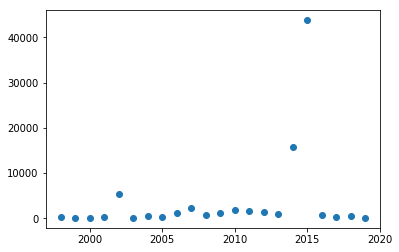

In [99]:

plt.scatter(data.year,data.amount)

In [100]:
#分離成訓練資料集跟測試資料集
X = data.year.values.reshape(len(data.year.values), 1)
x_train, x_test, y_train, y_test = train_test_split(X, data.amount.values, test_size=0.3, random_state = 321)

In [101]:
#建立模型並開始訓練
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

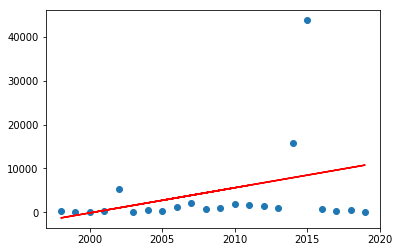

In [102]:
#印出訓練結果
amount_pred = model.predict(x_test)
plt.scatter(X, data.amount)
plt.plot(x_test, amount_pred, 'r')

# 心得:
#### 由上圖可以得知近幾年的登革熱通報病例數量有越來越多的趨勢